# NSL-KDD Dataset Exploration

This notebook explores the NSL-KDD dataset for Network Intrusion Detection.

**Dataset Overview:**
- Refined version of KDDCup'99 dataset
- 41 features + 1 label + 1 difficulty level
- Attack types: DoS, Probe, R2L, U2R
- ~125K training samples, ~22K test samples

## 1. Setup and Imports

In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

print("Setup complete!")

Setup complete!


## 2. Load NSL-KDD Dataset

In [2]:
# Column names for NSL-KDD
COLUMNS = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
]

# Attack type mapping
ATTACK_MAPPING = {
    'normal': 'Normal',
    # DoS attacks
    'back': 'DoS', 'land': 'DoS', 'neptune': 'DoS', 'pod': 'DoS',
    'smurf': 'DoS', 'teardrop': 'DoS', 'mailbomb': 'DoS', 'apache2': 'DoS',
    'processtable': 'DoS', 'udpstorm': 'DoS',
    # Probe attacks
    'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'satan': 'Probe',
    'mscan': 'Probe', 'saint': 'Probe',
    # R2L attacks
    'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'multihop': 'R2L',
    'phf': 'R2L', 'spy': 'R2L', 'warezclient': 'R2L', 'warezmaster': 'R2L',
    'sendmail': 'R2L', 'named': 'R2L', 'snmpgetattack': 'R2L', 'snmpguess': 'R2L',
    'xlock': 'R2L', 'xsnoop': 'R2L', 'worm': 'R2L',
    # U2R attacks
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R',
    'httptunnel': 'U2R', 'ps': 'U2R', 'sqlattack': 'U2R', 'xterm': 'U2R',
}

print(f"Total columns: {len(COLUMNS)}")
print(f"Attack categories: {set(ATTACK_MAPPING.values())}")

Total columns: 43
Attack categories: {'Normal', 'U2R', 'R2L', 'Probe', 'DoS'}


In [3]:
# Load training and test data
DATA_PATH = '../../data/raw/nsl-kdd/'

train_df = pd.read_csv(DATA_PATH + 'train.txt', header=None, names=COLUMNS)
test_df = pd.read_csv(DATA_PATH + 'test.txt', header=None, names=COLUMNS)

print(f"Training samples: {len(train_df):,}")
print(f"Test samples: {len(test_df):,}")
print(f"\nTraining shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Training samples: 125,973
Test samples: 22,544

Training shape: (125973, 43)
Test shape: (22544, 43)


In [4]:
# Preview the data
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


## 3. Data Overview

In [5]:
# Basic info
print("=" * 60)
print("TRAINING SET INFO")
print("=" * 60)
train_df.info()

TRAINING SET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-

In [6]:
# Statistical summary of numeric columns
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [7]:
# Check for missing values
missing = train_df.isnull().sum()
print(f"Total missing values: {missing.sum()}")
if missing.sum() > 0:
    print(missing[missing > 0])

Total missing values: 0


## 4. Feature Analysis

In [8]:
# Identify categorical vs numerical features
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove label and difficulty from features
if 'label' in categorical_features:
    categorical_features.remove('label')
if 'difficulty_level' in numerical_features:
    numerical_features.remove('difficulty_level')

print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"\nNumerical features ({len(numerical_features)}): {len(numerical_features)} features")

Categorical features (3): ['protocol_type', 'service', 'flag']

Numerical features (38): 38 features


In [9]:
# Analyze categorical features
for col in categorical_features:
    print(f"\n{col}:")
    print(train_df[col].value_counts()[:10])


protocol_type:
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
eco_i        4586
other        4359
ecr_i        3077
telnet       2353
finger       1767
Name: count, dtype: int64

flag:
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
Name: count, dtype: int64


## 5. Label Analysis

In [10]:
# Detailed attack types in training set
print("Detailed Attack Types (Training):")
print(train_df['label'].value_counts())

Detailed Attack Types (Training):
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [11]:
# Map to attack categories
train_df['attack_category'] = train_df['label'].map(lambda x: ATTACK_MAPPING.get(x.lower(), 'Unknown'))
test_df['attack_category'] = test_df['label'].map(lambda x: ATTACK_MAPPING.get(x.lower(), 'Unknown'))

# Binary label (Normal vs Attack)
train_df['binary_label'] = train_df['attack_category'].apply(lambda x: 0 if x == 'Normal' else 1)
test_df['binary_label'] = test_df['attack_category'].apply(lambda x: 0 if x == 'Normal' else 1)

print("Attack Category Distribution (Training):")
print(train_df['attack_category'].value_counts())
print("\nBinary Distribution (Training):")
print(train_df['binary_label'].value_counts())

Attack Category Distribution (Training):
attack_category
Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

Binary Distribution (Training):
binary_label
0    67343
1    58630
Name: count, dtype: int64


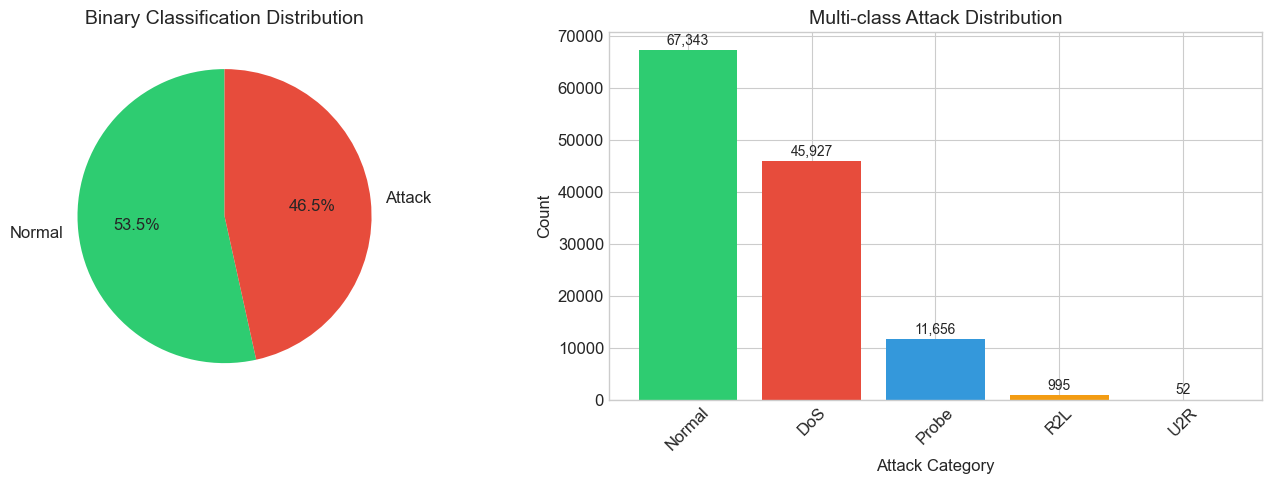

In [12]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Binary distribution
binary_counts = train_df['binary_label'].value_counts()
axes[0].pie(binary_counts, labels=['Normal', 'Attack'], autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[0].set_title('Binary Classification Distribution', fontsize=14)

# Multi-class distribution
category_counts = train_df['attack_category'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#3498db', '#f39c12', '#9b59b6']
axes[1].bar(category_counts.index, category_counts.values, color=colors)
axes[1].set_title('Multi-class Attack Distribution', fontsize=14)
axes[1].set_xlabel('Attack Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

for i, v in enumerate(category_counts.values):
    axes[1].text(i, v + 1000, f'{v:,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [13]:
# Compare training vs test distribution
train_cat = train_df['attack_category'].value_counts(normalize=True) * 100
test_cat = test_df['attack_category'].value_counts(normalize=True) * 100

comparison = pd.DataFrame({'Training (%)': train_cat, 'Test (%)': test_cat})
comparison = comparison.fillna(0)
print("Class Distribution Comparison:")
print(comparison.round(2))

Class Distribution Comparison:
                 Training (%)  Test (%)
attack_category                        
DoS                     36.46     33.08
Normal                  53.46     43.08
Probe                    9.25     10.74
R2L                      0.79     12.22
U2R                      0.04      0.89


## 6. Feature Correlations

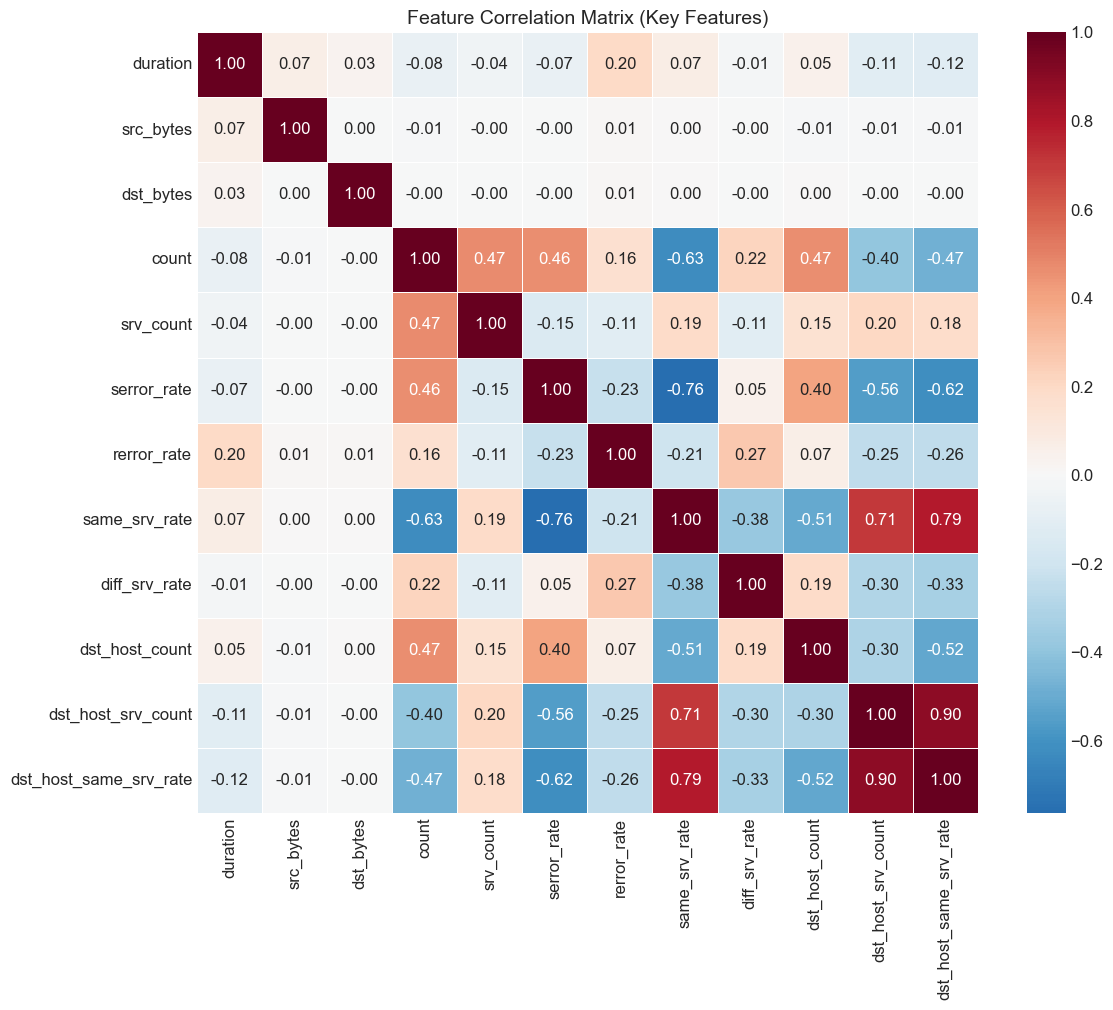

In [14]:
# Correlation matrix for numerical features (subset for visualization)
key_features = [
    'duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count',
    'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate'
]

corr_matrix = train_df[key_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f',
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix (Key Features)', fontsize=14)
plt.tight_layout()
plt.show()

## 7. Feature Distributions by Attack Type

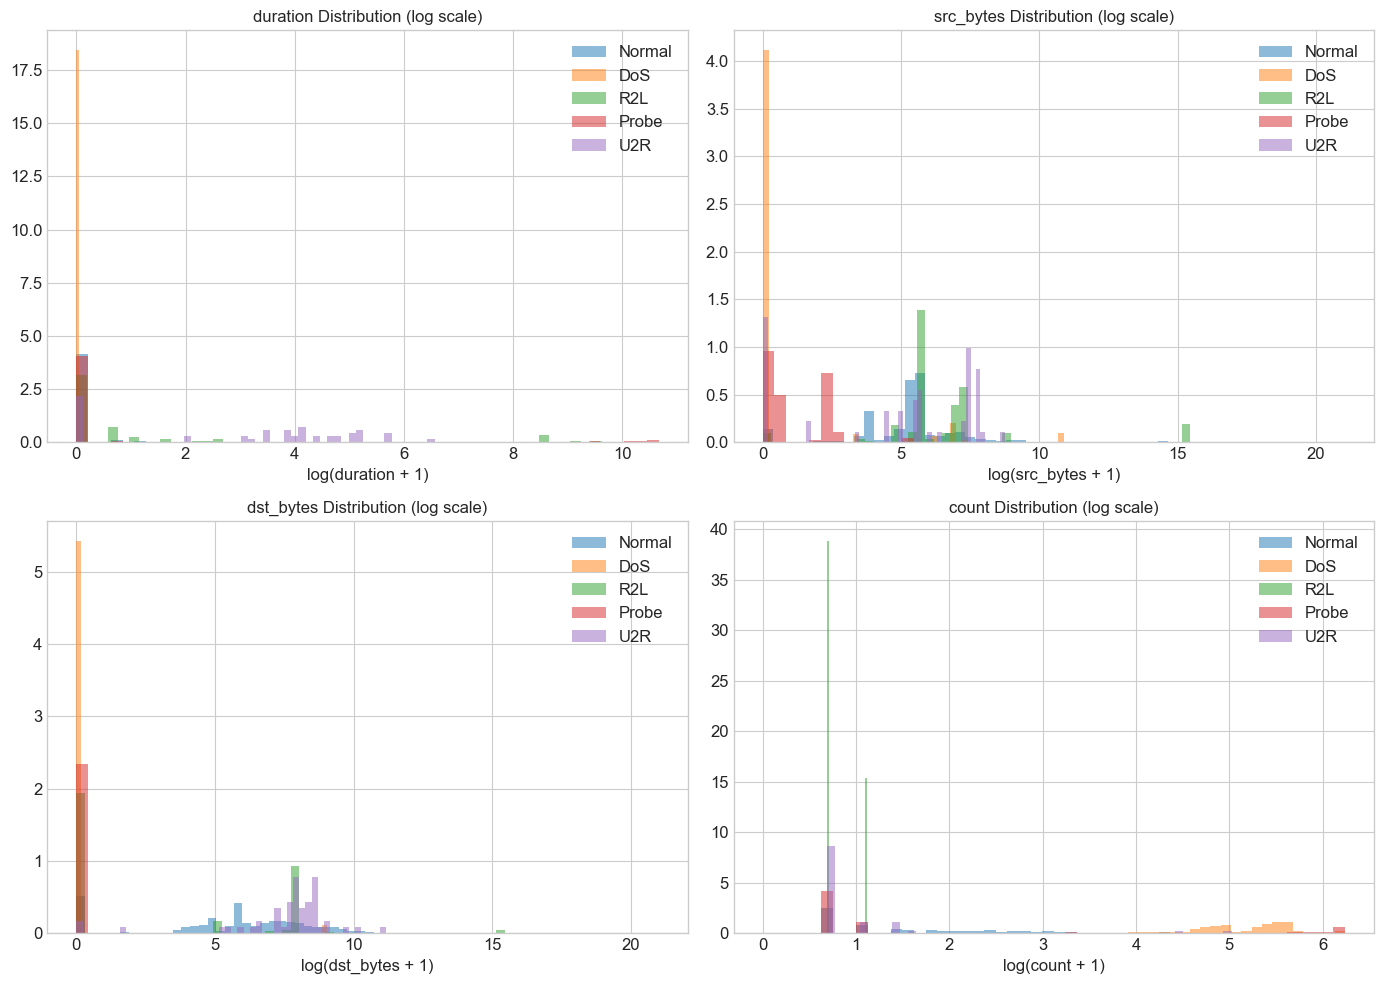

In [15]:
# Feature distributions by attack category
features_to_plot = ['duration', 'src_bytes', 'dst_bytes', 'count']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    for category in train_df['attack_category'].unique():
        data = train_df[train_df['attack_category'] == category][feature]
        # Log transform for better visualization (add 1 to avoid log(0))
        data_log = np.log1p(data)
        axes[idx].hist(data_log, bins=50, alpha=0.5, label=category, density=True)
    
    axes[idx].set_title(f'{feature} Distribution (log scale)', fontsize=12)
    axes[idx].set_xlabel(f'log({feature} + 1)')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## 8. Protocol and Service Analysis

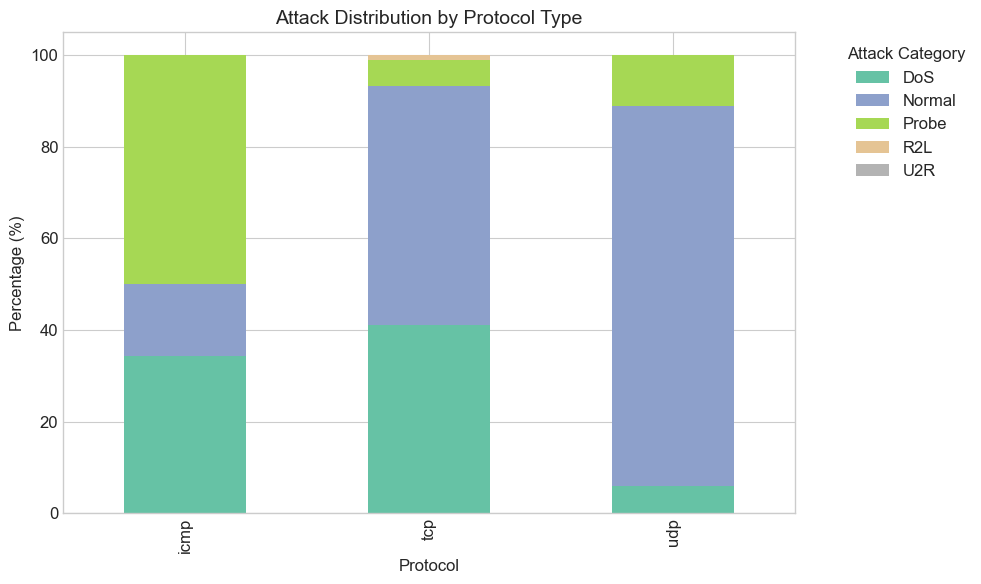

In [16]:
# Protocol analysis
protocol_attack = pd.crosstab(train_df['protocol_type'], train_df['attack_category'], normalize='index') * 100

protocol_attack.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Attack Distribution by Protocol Type', fontsize=14)
plt.xlabel('Protocol')
plt.ylabel('Percentage (%)')
plt.legend(title='Attack Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

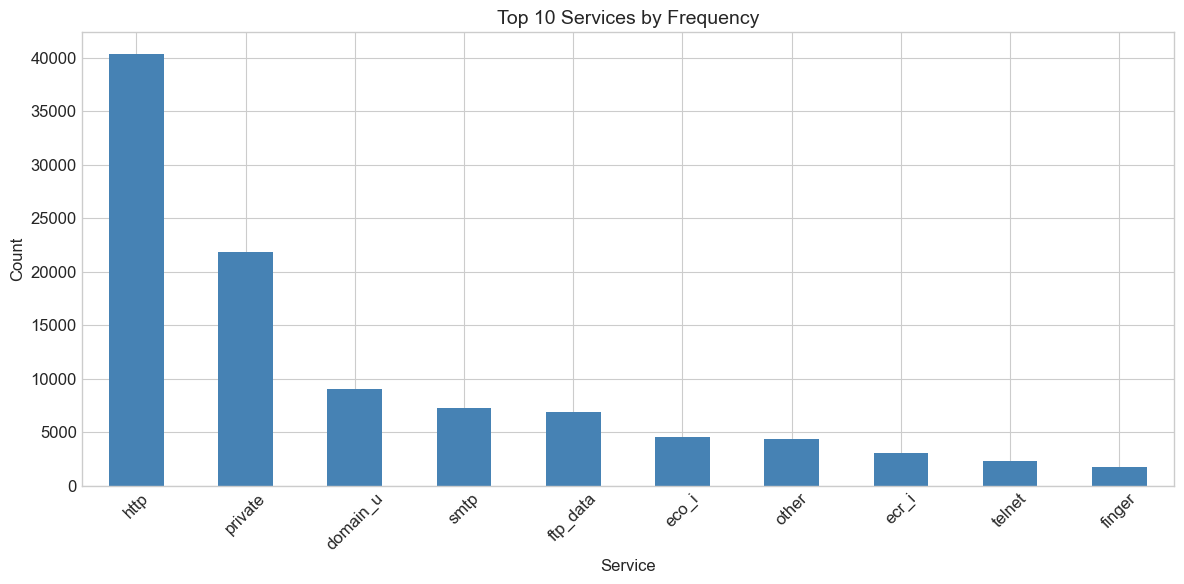

In [17]:
# Top 10 services by frequency
top_services = train_df['service'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_services.plot(kind='bar', color='steelblue')
plt.title('Top 10 Services by Frequency', fontsize=14)
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Difficulty Level Analysis

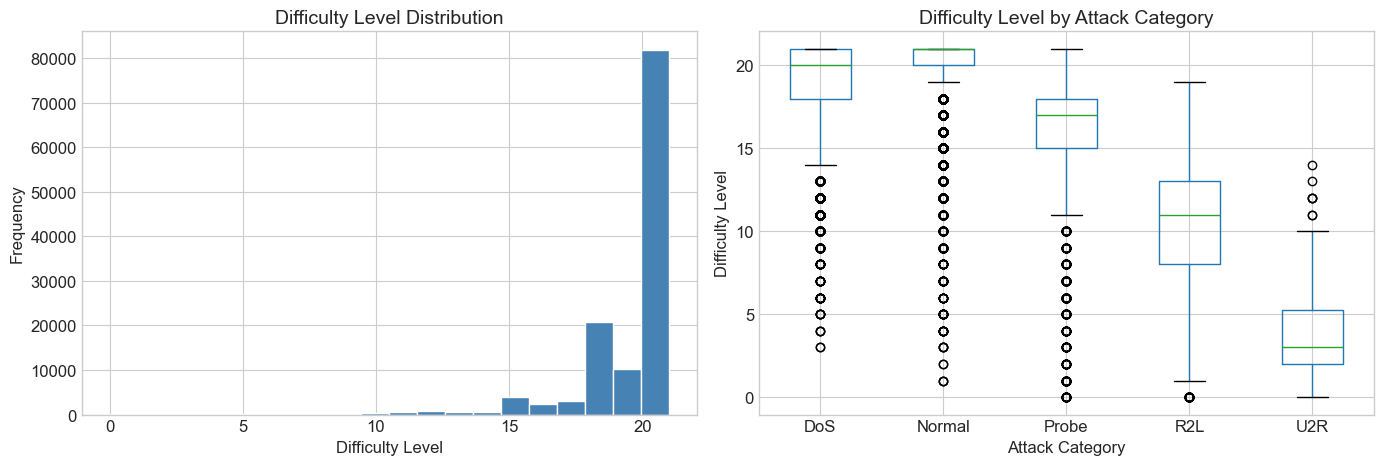

In [18]:
# Difficulty level distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train_df['difficulty_level'], bins=20, color='steelblue', edgecolor='white')
axes[0].set_title('Difficulty Level Distribution', fontsize=14)
axes[0].set_xlabel('Difficulty Level')
axes[0].set_ylabel('Frequency')

# Box plot by attack category
train_df.boxplot(column='difficulty_level', by='attack_category', ax=axes[1])
axes[1].set_title('Difficulty Level by Attack Category', fontsize=14)
axes[1].set_xlabel('Attack Category')
axes[1].set_ylabel('Difficulty Level')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

## 10. Key Findings Summary

In [19]:
print("=" * 60)
print("KEY FINDINGS SUMMARY")
print("=" * 60)

print(f"\n1. DATASET SIZE")
print(f"   - Training: {len(train_df):,} samples")
print(f"   - Test: {len(test_df):,} samples")
print(f"   - Features: 41 (3 categorical, 38 numerical)")

print(f"\n2. CLASS DISTRIBUTION (Training)")
for cat, count in train_df['attack_category'].value_counts().items():
    pct = count / len(train_df) * 100
    print(f"   - {cat}: {count:,} ({pct:.1f}%)")

print(f"\n3. CLASS IMBALANCE")
normal_count = (train_df['binary_label'] == 0).sum()
attack_count = (train_df['binary_label'] == 1).sum()
print(f"   - Normal: {normal_count:,} ({normal_count/len(train_df)*100:.1f}%)")
print(f"   - Attack: {attack_count:,} ({attack_count/len(train_df)*100:.1f}%)")
print(f"   - Ratio (Normal:Attack): 1:{attack_count/normal_count:.2f}")

print(f"\n4. UNIQUE ATTACK TYPES: {train_df['label'].nunique()}")

print(f"\n5. PROTOCOLS: {', '.join(train_df['protocol_type'].unique())}")

print(f"\n6. SERVICES: {train_df['service'].nunique()} unique services")

print("\n" + "=" * 60)

KEY FINDINGS SUMMARY

1. DATASET SIZE
   - Training: 125,973 samples
   - Test: 22,544 samples
   - Features: 41 (3 categorical, 38 numerical)

2. CLASS DISTRIBUTION (Training)
   - Normal: 67,343 (53.5%)
   - DoS: 45,927 (36.5%)
   - Probe: 11,656 (9.3%)
   - R2L: 995 (0.8%)
   - U2R: 52 (0.0%)

3. CLASS IMBALANCE
   - Normal: 67,343 (53.5%)
   - Attack: 58,630 (46.5%)
   - Ratio (Normal:Attack): 1:0.87

4. UNIQUE ATTACK TYPES: 23

5. PROTOCOLS: tcp, udp, icmp

6. SERVICES: 70 unique services



## 11. Next Steps

Based on this exploration:

1. **Preprocessing Needed:**
   - Encode categorical features (protocol_type, service, flag)
   - Normalize numerical features
   - Consider handling class imbalance (SMOTE, undersampling)

2. **Model Considerations:**
   - Binary classification (Normal vs Attack) as baseline
   - Multi-class classification for attack type identification
   - Consider ensemble methods for imbalanced classes

3. **Features to Focus On:**
   - `src_bytes`, `dst_bytes` - high variance, good discriminators
   - Rate-based features (`serror_rate`, `rerror_rate`, etc.)
   - Connection count features (`count`, `srv_count`)

In [20]:
# Save processed data for later use
train_df.to_csv('../../data/processed/nsl_kdd_train_processed.csv', index=False)
test_df.to_csv('../../data/processed/nsl_kdd_test_processed.csv', index=False)
print("Processed data saved!")

Processed data saved!
